In [1]:
import os
os.getcwd()
os.chdir('Downloads')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('Dataset_w6.xlsx')
data

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,11068.9,118,16324
192,Viet Nam,South-easternAsia,330967,95541,2067.9,136,174111
193,Yemen,WesternAsia,527968,28250,1106.4,136,6861
194,Zambia,EasternAfrica,752612,17094,1311.1,179,7442


In [4]:
data.isnull().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

# 1. Find out how many countries are there in the dataset.

In [5]:
data.country.nunique()

196

There are 196 countries in this dataset.

# 2.Examine the data using visualizations.

<AxesSubplot:xlabel='Region'>

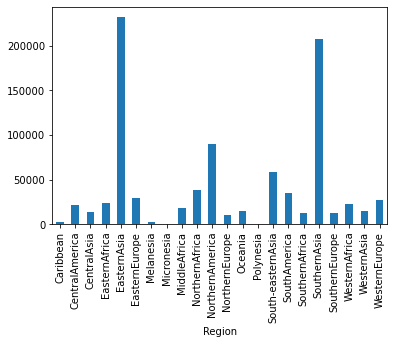

In [6]:
dv=data.groupby("Region")['Population in thousands (2017)'].mean().plot(kind='bar')
dv

The population mean is high in East Asia.

# 3.Find out how many countries wrt regions are available in the dataset.

In [7]:
df=data.groupby(["Region"])[["country"]].count()
df

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


<AxesSubplot:xlabel='Region'>

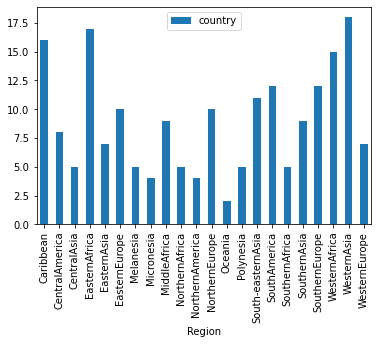

In [8]:
df.plot(kind='bar')

# 4.a. On average which region has the highest GDP per capita

In [9]:
dd=data[['Region','GDP per capita (current US$)']].groupby(['Region']).agg('mean')
dd

,GDP per capita (current US$)
Region,
Caribbean,15135.562500
CentralAmerica,6348.137500
CentralAsia,4329.880000
EasternAfrica,2088.852941
EasternAsia,27967.614286
EasternEurope,9292.490000
Melanesia,9261.960000
Micronesia,5008.300000
MiddleAfrica,3928.833333


<AxesSubplot:xlabel='Region'>

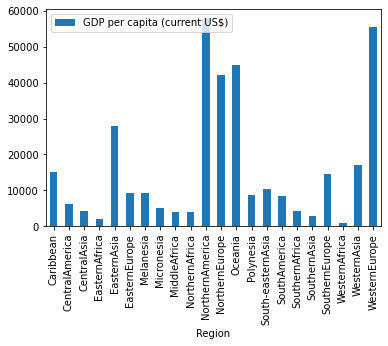

In [10]:
dd.plot(kind='bar')

In [11]:
dd.nlargest(1,['GDP per capita (current US$)'])

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


On average,North America has the highest GDP per capita.

# 4.b. On average which region has the highest international tradem,imports.


In [12]:
di=data[['Region','International trade: Imports (million US$)']].groupby(['Region']).agg('mean')
di

,International trade: Imports (million US$)
Region,
Caribbean,3057.312500
CentralAmerica,57031.500000
CentralAsia,12063.400000
EasternAfrica,4726.176471
EasternAsia,451995.000000
EasternEurope,85243.900000
Melanesia,2896.400000
Micronesia,99.000000
MiddleAfrica,4381.222222


<AxesSubplot:xlabel='Region'>

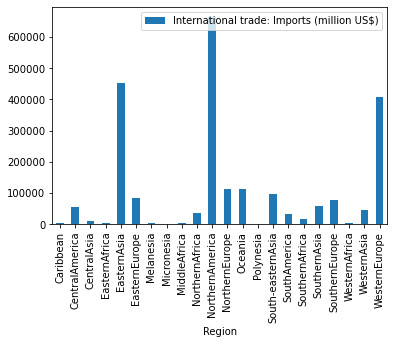

In [13]:
di.plot(kind='bar')

In [14]:
di.nlargest(1,['International trade: Imports (million US$)'])

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


On average,North America has the highest international trade,imports.

# 5.Find out which region has more consistent wrt GDP per capita.

In [15]:
dc=data[['Region','GDP per capita (current US$)']].groupby(['Region']).agg('std')
dc

,GDP per capita (current US$)
Region,
Caribbean,14579.371326
CentralAmerica,4180.440883
CentralAsia,4152.215490
EasternAfrica,3716.131770
EasternAsia,27485.120923
EasternEurope,5415.488739
Melanesia,13855.842686
Micronesia,4820.669694
MiddleAfrica,5274.846281


<AxesSubplot:xlabel='Region'>

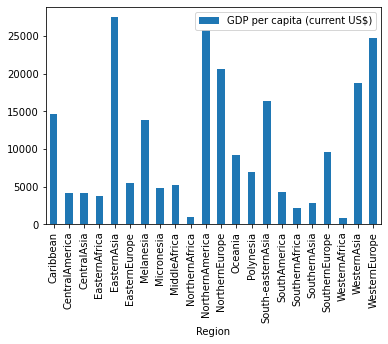

In [16]:
dc.plot(kind='bar')

In [17]:
dc.nsmallest(1,['GDP per capita (current US$)'])

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399


Western Africa is more consistent wrt GDP per capita.